In [3]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from contractions import contractions_dict
contractions.add("n't", "not")
contractions.add("nt", "not")
import string
punctuation_string = string.punctuation
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time as t
import sklearn.metrics as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
#from jsondataset import files_in_directory
from pickle import dump
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/combo_Am_Hand.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55347 entries, 0 to 55346
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      55346 non-null  object
 1   polarity    55347 non-null  object
 2   nltk_texts  55347 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [6]:
df.dropna()

,review,polarity,nltk_texts
0,order op nail polish receive one please ...,pos,<Text: I ordered 2 of the OP! nail polish...>
1,love color opi product come timely manner ...,pos,<Text: Love this color and OPI. Product came i...
2,not like definitely not worth price s thick...,neg,<Text: because I didn't like this at all and...>
3,cool pen five star,pos,<Text: Cool pen Five Stars...>
4,immortan joe carry way valhalla tell shiny ...,neg,<Text: Immortan Joe carried me all the way to...>
...,...,...,...
55342,bmw,neut,<Text: 15 Any BMW...>
55343,top world kidé,pos,<Text: On top of the world kidüòé...>
55344,tudent oicer conduct midnight patrol around ci...,neg,<Text: Student officers conducting midnight pa...
55345,a red notice,neut,<Text: SAS Red Notice https://t.co/8io4GGQMXT...>


In [7]:
df['review']

0        order   op   nail polish receive one   please ...
1        love color opi   product come timely manner   ...
2        not like definitely not worth price    s thick...
3                                       cool pen five star
4        immortan joe carry way valhalla tell    shiny ...
                               ...                        
55342                                                  bmw
55343                                       top world kidé
55344    tudent oicer conduct midnight patrol around ci...
55345                                         a red notice
55346                    womb enough gender twice dr maybe
Name: review, Length: 55347, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55347 entries, 0 to 55346
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      55346 non-null  object
 1   polarity    55347 non-null  object
 2   nltk_texts  55347 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [9]:
y=df['polarity'].astype('str').array
X=df['review'].astype('str').array

In [10]:
X

<PandasArray>
[                                                                                                                                                                                                                                                                              'order   op   nail polish receive one   please ship one soon   thank order   op   nail polish',
                                                                                                                                                                                                                            'love color opi   product come timely manner   enjoy name opi put product   put color edge follow right top coat seem last long   gorgeous color',
 'not like definitely not worth price    s thick awkward get hard reach place   least   work well trim prior shaving   not let get point   s unnecessary anyway   m sure s go bikini use   not trim hair short enough want see bikini use    plus   price   

In [11]:
# create pipeline
start_time = time.time()
estimators = []
vectorizer = TfidfVectorizer(ngram_range=(1,1))
estimators.append(('vectorizer', vectorizer))
estimators.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
model_KNN = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
#results = cross_val_score(model_LR, X, y, cv=kfold)
scoring = 'accuracy'
cv_results = cross_val_score(model_KNN, X, y, cv=kfold, scoring=scoring, error_score='raise')
model_KNN.fit(X, y)
predicted = cross_val_predict(model_KNN, X, y, cv=kfold)
predicted_prob = cross_val_predict(model_KNN, X, y, cv=kfold, method='predict_proba')

cv results  [0.68870822 0.59132791 0.67515808 0.58897922 0.59150858 0.59277326
 0.60108401 0.59486809 0.57896639 0.5811348 ]
 
classification report
              precision    recall  f1-score   support

         neg       0.49      0.73      0.59     18998
        neut       0.65      0.57      0.61     18681
         pos       0.87      0.52      0.65     17668

    accuracy                           0.61     55347
   macro avg       0.67      0.61      0.61     55347
weighted avg       0.67      0.61      0.61     55347

 
accuracy 0.6084521292933673
 
precision 0.670494686540322
 
f1 0.6657134362867637
 
jaccard 0.44358784053322403
 
matthews corr 0.4253628059952481
 
cohen's kapp 0.40941593698301326
 
confusion matrix


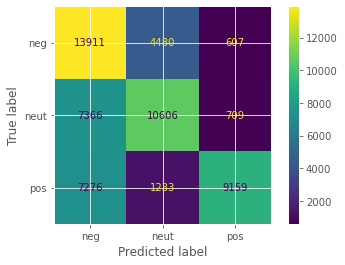

23.778631114959715


In [12]:
#results
print("cv results ", cv_results)
print(' ')
print("classification report")
print(sm.classification_report(y, predicted))
print(' ')
print("accuracy", sm.accuracy_score(y, predicted))
print(' ')
print("precision", sm.precision_score(y, predicted, average='macro'))
print(' ')
print("f1", sm.precision_score(y, predicted, average='weighted'))
print(' ')
print("jaccard", sm.jaccard_score(y, predicted, average='macro'))
print(' ')
print("matthews corr", sm.matthews_corrcoef(y, predicted))
print(' ')
print("cohen's kapp", sm.cohen_kappa_score(y, predicted))
print(' ')
print("confusion matrix")
cm = sm.confusion_matrix(y, predicted, labels=model_KNN.classes_)
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_KNN.classes_)
disp.plot()
plt.show()
end_time=time.time()
print((end_time-start_time)/60)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=['pos', 'neut', 'neg'])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    model_KNN
)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

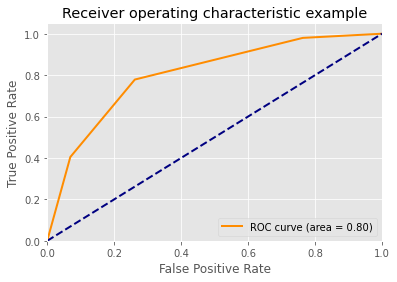

In [14]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [15]:
y_score
predicted = classifier.predict(X_test)
predicted

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [16]:
df_prob = pd.DataFrame(y_score, columns=['prob_yes', 'prob_neut', 'prob_neg'])
df_pred = pd.DataFrame(predicted, columns=['pred_yes', 'pred_neut', 'pred_neg'])
df_prob['pred_yes'] = df_pred['pred_yes']
df_prob['pred_neut'] = df_pred['pred_neut']
df_prob['pred_neg'] = df_pred['pred_neg']


In [17]:
y_score

array([[0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.        , 0.33333333],
       [0.        , 0.        , 1.        ],
       ...,
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.        ],
       [0.66666667, 0.33333333, 0.        ]])

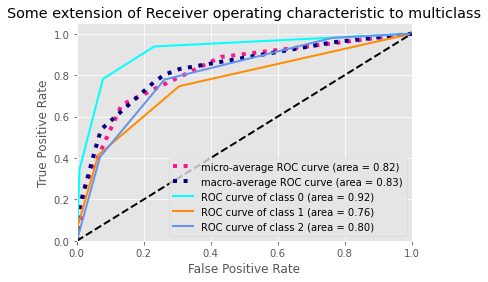

In [18]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [19]:
'''#Choose Multinomial NB as model ( to get app running, change later)
model_used = classifier.fit(X,y)

# save the model to disk
filename = 'finalized_onevsrest_model.sav'
dump(model_used, open(filename, 'wb'))'''

"#Choose Multinomial NB as model ( to get app running, change later)\nmodel_used = classifier.fit(X,y)\n\n# save the model to disk\nfilename = 'finalized_onevsrest_model.sav'\ndump(model_used, open(filename, 'wb'))"

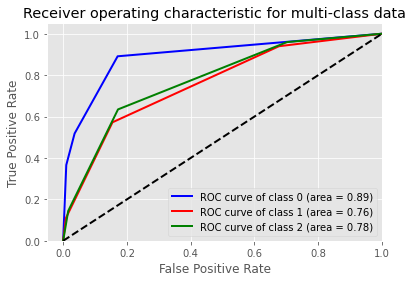

In [20]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


clf = OneVsRestClassifier(model_KNN)
y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [21]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaa', ..., 'ωor', 'ωä', 'ωωöö'], dtype=object)